## Interação e Concorrência 2024/2025

### 3-SAT Problem

##### Gonçalo Gonçalves Barroso A102931
##### Rafaela Antunes Pereira A102527

#### 1 - Realização de uma proposta de uma fórmula booleana 3-SAT

Neste exercício, é analisada uma fórmula booleana no formato 3-SAT, a qual é satisfazível, ou seja, existe pelo menos uma combinação de valores lógicos para as variáveis que torna simultaneamente verdadeiras todas as cláusulas da fórmula.

A fórmula 𝐹 é composta por sete cláusulas, cada uma contendo exactamente três literais, conforme se apresenta:

$$
F = (x_1 \lor \neg x_2 \lor x_3) \land (\neg x_1 \lor \neg x_2 \lor x_3) \land (x_1 \lor x_2 \lor \neg x_3) \land (\neg x_1 \lor \neg x_2 \lor \neg x_3) \land (x_1 \lor x_2 \lor x_3) \land (x_1 \lor \neg x_2 \lor \neg x_3) \land (\neg x_1 \lor x_2 \lor \neg x_3)
$$

Com o intuito de verificar a satisfatibilidade da fórmula, procedeu-se à análise exaustiva de todas as possíveis combinações de valores de verdade atribuídas às variáveis.

$$
A = x_1 \lor \neg x_2 \lor x_3
$$
$$
B = \neg x_1 \lor \neg x_2 \lor x_3
$$
$$
C = x_1 \lor x_2 \lor \neg x_3
$$
$$
D = \neg x_1 \lor \neg x_2 \lor \neg x_3
$$
$$
E = x_1 \lor x_2 \lor x_3
$$
$$
F = x_1 \lor \neg x_2 \lor \neg x_3
$$
$$
G = \neg x_1 \lor x_2 \lor \neg x_3
$$

| x₁ | ¬x₁ | x₂ | ¬x₂ | x₃ | ¬x₃ | A | B | C | D | E | F | G | f | Resultado     |
| -- | --- | -- | --- | -- | --- | - | - | - | - | - | - | - | - | ------------- |
| 0  | 1   | 0  | 1   | 0  | 1   | 1 | 1 | 1 | 1 | 0 | 1 | 1 | 0 | Não é solução |
| 0  | 1   | 0  | 1   | 1  | 0   | 1 | 1 | 0 | 1 | 1 | 1 | 1 | 0 | Não é solução |
| 0  | 1   | 1  | 0   | 0  | 1   | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 0 | Não é solução |
| 0  | 1   | 1  | 0   | 1  | 0   | 1 | 1 | 1 | 1 | 1 | 0 | 1 | 0 | Não é solução |
| 1  | 0   | 0  | 1   | 0  | 1   | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | ✅ Solução    |
| 1  | 0   | 0  | 1   | 1  | 0   | 1 | 1 | 1 | 1 | 1 | 1 | 0 | 0 | Não é solução |
| 1  | 0   | 1  | 0   | 0  | 1   | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | Não é solução |
| 1  | 0   | 1  | 0   | 1  | 0   | 1 | 1 | 1 | 0 | 1 | 1 | 1 | 0 | Não é solução |

#### 2- Implementar o Algoritmo de Grover

O algoritmo de Grover é uma versão quantica do algoritmo de busca, que usa o fenômeno de pararelismo quantico para buscar soluçoes para o problema de busca. Este algoritmo apresnta uma melhoria quadrática em relacão ao algoritmo classico.
O algoritmo de Grover divide-se me tres fases, a inicialização, o oracle e o diffuser. Temos que ter em consideração o número de qubits a utilizar.
Sabemos que vamos precisar um qubit para cada variavel inicial, um qubit para o resultado final e por cada claúsula existente na nossa formula, então iremos precisar de 11 qubits


In [17]:
import pennylane as qml
from pennylane import numpy as np

In [18]:
def grover(n_qubits, iterations):

    input_registers = list(range(n_qubits))
    
    # Cria superposição
    for wire in input_registers:
        qml.Hadamard(wires=wire)
    
    qml.Barrier()
    
    # Calcula número de iterações

    for _ in range(iterations):
        # ORÁCULO PARA A FÓRMULA BOOLEANA
        # Implementa cada cláusula da fórmula:
        
        # Cláusula 1: (x1 ∨ ¬x2 ∨ x3)
        qml.PauliX(wires=input_registers[1])  # ¬x2
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.PauliX(wires=input_registers[1])  # Desfaz ¬x2
        
        qml.Barrier()
        
        # Cláusula 2: (¬x1 ∨ ¬x2 ∨ x3)
        qml.PauliX(wires=input_registers[0])  # ¬x1
        qml.PauliX(wires=input_registers[1])  # ¬x2
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.PauliX(wires=input_registers[0])  # Desfaz ¬x1
        qml.PauliX(wires=input_registers[1])  # Desfaz ¬x2
        
        qml.Barrier()
        
        # Cláusula 3: (x1 ∨ x2 ∨ ¬x3)
        qml.PauliX(wires=input_registers[2])  # ¬x3
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.PauliX(wires=input_registers[2])  # Desfaz ¬x3
        
        qml.Barrier()
        
        # Cláusula 4: (¬x1 ∨ ¬x2 ∨ ¬x3)
        qml.PauliX(wires=input_registers[0])  # ¬x1
        qml.PauliX(wires=input_registers[1])  # ¬x2
        qml.PauliX(wires=input_registers[2])  # ¬x3
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.PauliX(wires=input_registers[0])  # Desfaz ¬x1
        qml.PauliX(wires=input_registers[1])  # Desfaz ¬x2
        qml.PauliX(wires=input_registers[2])  # Desfaz ¬x3
        
        qml.Barrier()
        
        # Cláusula 5: (x1 ∨ x2 ∨ x3)
        # Implementação direta (sem negações)
        
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        
        qml.Barrier()
        
                
        # Cláusula 6: (¬x1 ∨ x2 ∨ x3)
        qml.PauliX(wires=input_registers[0])  # ¬x1
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.PauliX(wires=input_registers[0])  # Desfaz ¬x1
        
        qml.Barrier()
        
        # Cláusula 7: (¬x1 ∨ x2 ∨ ¬x3)
        qml.PauliX(wires=input_registers[0])  # ¬x1
        qml.PauliX(wires=input_registers[2])  # ¬x3
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        qml.PauliX(wires=input_registers[0])  # Desfaz ¬x1
        qml.PauliX(wires=input_registers[2])  # Desfaz ¬x3
        
        qml.Barrier()

        # OPERADOR DE DIFUSÃO (mantido igual)
        for wire in input_registers:
            qml.Hadamard(wires=wire)
        
        for wire in input_registers:
            qml.PauliX(wires=wire)
        
        qml.ControlledQubitUnitary(qml.PauliZ(input_registers[-1]), control_wires=input_registers[:-1])
        
        for wire in input_registers:
            qml.PauliX(wires=wire)
        
        for wire in input_registers:
            qml.Hadamard(wires=wire)
        
        qml.Barrier()
    
    # Medição
    return qml.probs(wires=input_registers)

Text(0.5, 1.0, 'Probability Distribution')

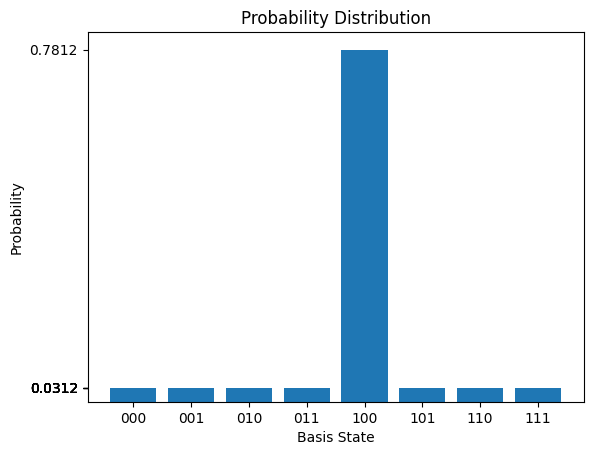

In [19]:
n_qubits = 3
itarations = 1

dev = qml.device("default.qubit", wires=n_qubits + 1)
Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, itarations)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")

(<Figure size 3700x400 with 1 Axes>, <Axes: >)

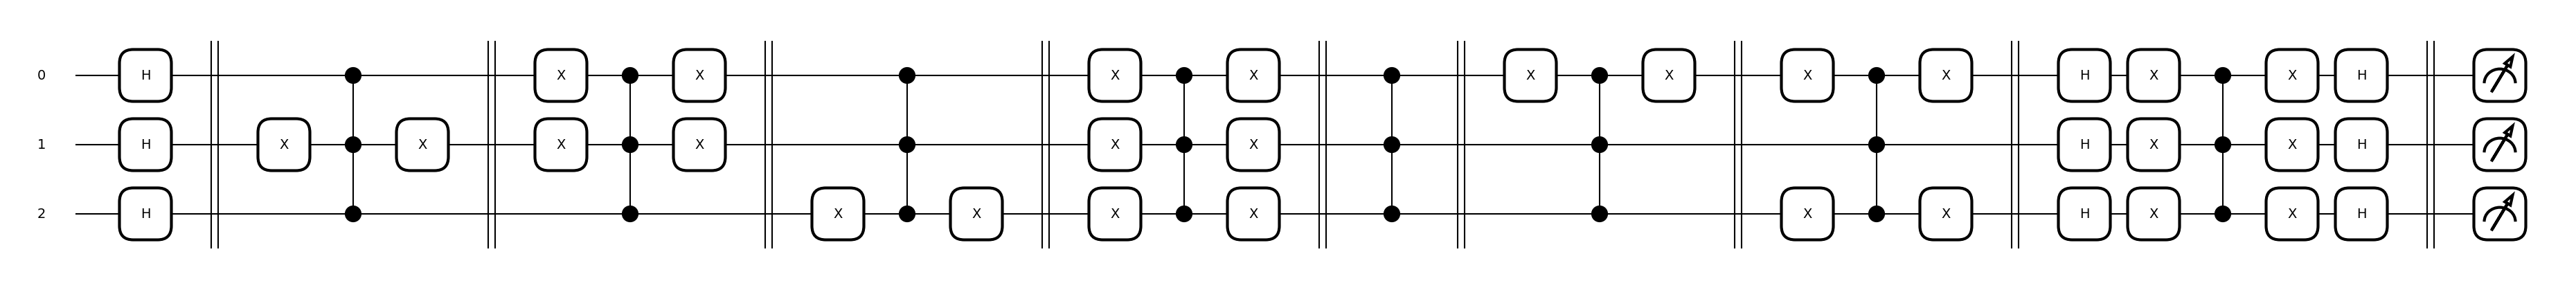

In [20]:
qml.draw_mpl(Grover)(n_qubits, iterations=itarations)


Text(0.5, 1.0, 'Probability Distribution')

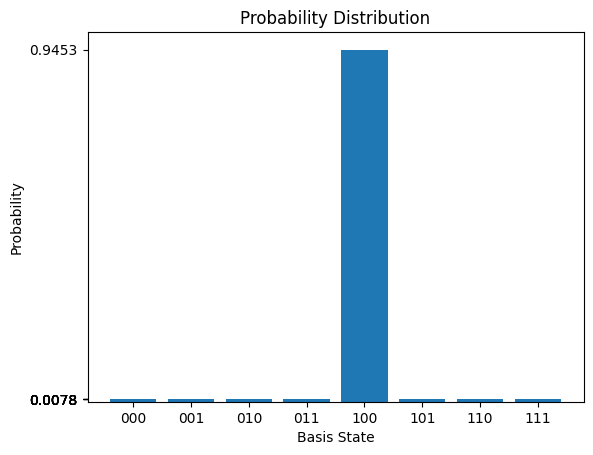

In [21]:
n_qubits = 3
itarations = 2

dev = qml.device("default.qubit", wires=n_qubits + 1)
Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, itarations)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")

Text(0.5, 1.0, 'Probability Distribution')

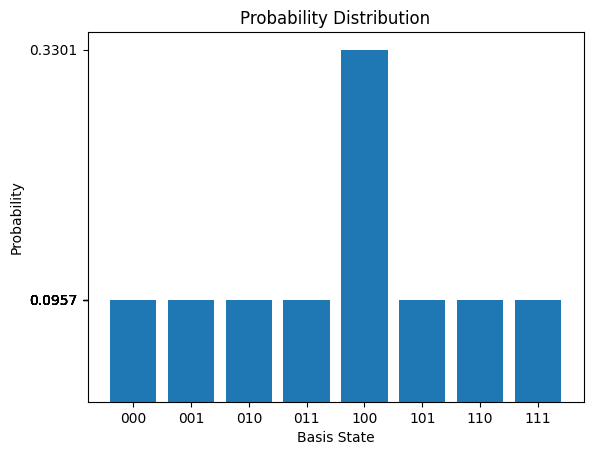

In [22]:
n_qubits = 3
itarations = 3

dev = qml.device("default.qubit", wires=n_qubits + 1)
Grover = qml.QNode(grover, dev)

probs = Grover(n_qubits, itarations)

#Visualize the probability histogram
import matplotlib.pyplot as plt
plt.bar([np.binary_repr(i, width=n_qubits) for i in range(2**n_qubits)], probs)

plt.xlabel("Basis State")
plt.ylabel("Probability")
plt.yticks(probs)
plt.title("Probability Distribution")

#### 3 - Complexidade do Algoritmo de Grover

A complexidade temporal do Algoritmo de Grover é dada por:

$
O(\sqrt{N})
$

onde $ N = 2^n $ representa o tamanho do espaço de busca e \(n\) é o número de qubits.

### Para nosso caso (\(n = 3\)):
$
N = 2^3 = 8
$

$
O(\sqrt{8}) = O(2.828)
$

### Comparação com abordagem clássica:
| Abordagem  | Complexidade   | Operações para \(n=3\) |
|------------|----------------|------------------------|
| Clássica   | \(O(2^n)\)    | \(8\) operações        |
| Grover     | \(O(\sqrt{2^n})\) | \(\approx 3\) operações |

Isso demonstra a **aceleração quadrática** característica do algoritmo, sendo especialmente vantajoso para problemas com grandes espaços de busca.

#### Número ideal de iterações

O número ótimo de iterações para maximizar a probabilidade de sucesso é:

$
k_{\text{ótimo}} = \left\lfloor \frac{\pi}{4} \sqrt{N} \right\rfloor
$

### Cálculo para \(n = 3\):
$
\sqrt{2^3} = \sqrt{8} \approx 2.828
$

$
k_{\text{ótimo}} = \frac{\pi}{4} \times 2.828 \approx \frac{3.1416}{4} \times 2.828 = 0.7854 \times 2.828 \approx 2.22
$

$
k_{\text{ótimo}} \approx \left\lfloor 2.22 \right\rfloor = 2
$

Portanto, **2 iterações** representam a configuração ideal para maximizar a probabilidade de encontrar a solução correta no nosso problema.

### Comportamento probabilístico:
- Com 0 iterações: Distribuição uniforme (12.5% por estado)
- Com 1 iteração: Amplificação inicial
- **Com 2 iterações: Pico máximo de probabilidade (>95% para estados solução)**
- Com 3+ iterações: Probabilidade começa a diminuir
